In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
from data_preprocessing_final import initiate_data

In [3]:
data = pd.read_csv('Ames_HousePrice.csv', index_col=0)

In [4]:
train_data_linear, train_target_linear, test_data_linear, test_target_linear, train_data_tree, train_target_tree, test_data_tree, test_target_tree = initiate_data(data)

In [5]:
train_data_tree

,PID,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,...,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Bsmt_Unfin_Ratio,TotalLivArea
0,528365060,5.0,1.0,3.0,4.0,0.0,18.0,2.0,0.0,5.0,...,0.333333,0.852174,0.660618,0.175562,0.207547,0.213439,0.0,0.0,0.105263,0.432796
1,534276180,5.0,0.0,3.0,4.0,0.0,15.0,2.0,0.0,2.0,...,0.333333,0.617391,0.266129,0.000000,0.097035,0.000000,0.0,0.0,0.279642,0.188281
2,532354160,5.0,0.0,3.0,0.0,0.0,22.0,1.0,0.0,2.0,...,0.000000,0.756522,0.491935,0.000000,0.420485,0.000000,0.0,0.0,0.236111,0.154957
3,535152280,5.0,1.0,3.0,0.0,0.0,15.0,1.0,0.0,2.0,...,0.333333,0.539130,0.222446,0.000000,0.080863,0.000000,0.0,0.0,0.471586,0.268120
4,528344100,5.0,0.0,3.0,0.0,0.0,18.0,2.0,0.0,5.0,...,0.333333,0.895652,0.454301,0.175562,0.000000,0.000000,0.0,0.0,0.302857,0.447792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,534278070,5.0,0.0,3.0,0.0,0.0,15.0,2.0,0.0,2.0,...,0.333333,0.530435,0.387097,0.000000,0.133423,0.000000,0.0,0.0,0.211832,0.300472
2056,905225090,5.0,1.0,3.0,4.0,0.0,4.0,2.0,0.0,7.0,...,0.333333,0.530435,0.225806,0.091994,0.037736,0.000000,0.0,0.0,1.000000,0.317134
2057,527180040,5.0,1.0,3.0,4.0,0.0,8.0,2.0,0.0,2.0,...,0.333333,0.826087,0.340054,0.134831,0.000000,0.000000,0.0,0.0,0.510000,0.281727
2058,527405160,5.0,1.0,3.0,4.0,0.0,15.0,2.0,0.0,2.0,...,0.000000,0.817391,0.443548,0.067416,0.000000,0.000000,0.0,0.0,0.289352,0.154957


In [7]:
train_target_tree = np.exp(train_target_tree)
test_target_tree = np.exp(test_target_tree)
train_target_tree

0       341000.0
1       124000.0
2       141000.0
3       132000.0
4       336000.0
          ...   
2055    177625.0
2056    165000.0
2057    171500.0
2058    120500.0
2059     88000.0
Name: SalePrice, Length: 2060, dtype: float64

In [8]:
train_data_tree = train_data_tree.drop('PID', axis = 1)
train_data_tree

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Bsmt_Unfin_Ratio,TotalLivArea
0,5.0,1.0,3.0,4.0,0.0,18.0,2.0,0.0,5.0,1.0,...,0.333333,0.852174,0.660618,0.175562,0.207547,0.213439,0.0,0.0,0.105263,0.432796
1,5.0,0.0,3.0,4.0,0.0,15.0,2.0,0.0,2.0,1.0,...,0.333333,0.617391,0.266129,0.000000,0.097035,0.000000,0.0,0.0,0.279642,0.188281
2,5.0,0.0,3.0,0.0,0.0,22.0,1.0,0.0,2.0,0.0,...,0.000000,0.756522,0.491935,0.000000,0.420485,0.000000,0.0,0.0,0.236111,0.154957
3,5.0,1.0,3.0,0.0,0.0,15.0,1.0,0.0,2.0,0.0,...,0.333333,0.539130,0.222446,0.000000,0.080863,0.000000,0.0,0.0,0.471586,0.268120
4,5.0,0.0,3.0,0.0,0.0,18.0,2.0,0.0,5.0,1.0,...,0.333333,0.895652,0.454301,0.175562,0.000000,0.000000,0.0,0.0,0.302857,0.447792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,5.0,0.0,3.0,0.0,0.0,15.0,2.0,0.0,2.0,0.0,...,0.333333,0.530435,0.387097,0.000000,0.133423,0.000000,0.0,0.0,0.211832,0.300472
2056,5.0,1.0,3.0,4.0,0.0,4.0,2.0,0.0,7.0,1.0,...,0.333333,0.530435,0.225806,0.091994,0.037736,0.000000,0.0,0.0,1.000000,0.317134
2057,5.0,1.0,3.0,4.0,0.0,8.0,2.0,0.0,2.0,0.0,...,0.333333,0.826087,0.340054,0.134831,0.000000,0.000000,0.0,0.0,0.510000,0.281727
2058,5.0,1.0,3.0,4.0,0.0,15.0,2.0,0.0,2.0,0.0,...,0.000000,0.817391,0.443548,0.067416,0.000000,0.000000,0.0,0.0,0.289352,0.154957


In [9]:
test_data_tree = test_data_tree.drop('PID', axis = 1)
test_data_tree

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Bsmt_Unfin_Ratio,TotalLivArea
0,5.0,1.0,3.0,4.0,0.0,15.0,2.0,0.0,2.0,0.0,...,0.333333,0.504348,0.188172,0.158006,0.000000,0.000000,0.0,0.0,0.141176,0.297140
1,6.0,1.0,3.0,4.0,0.0,3.0,2.0,0.0,0.0,0.0,...,0.000000,0.730435,0.419355,0.214888,0.000000,0.031621,0.0,0.0,0.477273,0.132741
2,5.0,1.0,3.0,4.0,0.0,7.0,2.0,0.0,0.0,0.0,...,0.000000,0.434783,0.161290,0.064607,0.000000,0.182806,0.0,0.0,0.000000,0.127326
3,5.0,1.0,3.0,4.0,0.0,5.0,2.0,0.0,5.0,0.0,...,0.000000,0.895652,0.433468,0.404494,0.048518,0.000000,0.0,0.0,0.300851,0.344210
4,5.0,1.0,3.0,0.0,0.0,14.0,2.0,0.0,2.0,0.0,...,0.000000,0.800000,0.241935,0.000000,0.000000,0.000000,0.0,0.0,0.331361,0.149681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,5.0,1.0,3.0,4.0,0.0,0.0,2.0,4.0,2.0,0.0,...,0.333333,0.973913,0.435484,0.101124,0.021563,0.000000,0.0,0.0,1.000000,0.264371
511,5.0,1.0,3.0,4.0,0.0,6.0,2.0,0.0,5.0,0.0,...,0.666667,0.400000,0.169355,0.000000,0.080863,0.000000,0.0,0.0,0.761285,0.399889
512,6.0,1.0,3.0,4.0,0.0,11.0,0.0,0.0,2.0,0.0,...,0.000000,0.234783,0.067204,0.000000,0.000000,0.094862,0.0,0.0,1.000000,0.141627
513,5.0,1.0,3.0,4.0,0.0,7.0,1.0,0.0,2.0,0.0,...,0.000000,0.930435,0.349462,0.000000,0.129380,0.000000,0.0,0.0,0.000000,0.071369


In [10]:
tree_model = DecisionTreeRegressor(max_depth = None, random_state=0)

In [11]:
tree_model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [22]:
from sklearn.metrics import mean_squared_error

In [62]:
train_preds = tree_model.predict(X_train)
train_mse = mean_squared_error(y_train,train_preds)
print('Train set MSE is {:.3f}'.format(train_mse))

test_preds = tree_model.predict(X_test)
test_mse = mean_squared_error(y_test,test_preds)
print('Test set MSE is {:.3f}'.format(test_mse))


Train set MSE is 0.000
Test set MSE is 1265372791.752


In [29]:
tree_model = DecisionTreeRegressor(max_depth = 20, random_state=0)
tree_model.fit(X_train, y_train)
train_preds = tree_model.predict(X_train)
train_mse = mean_squared_error(y_train,train_preds)
print('Train set MSE is {:.3f}'.format(train_mse))
print('Train set R2 is {:.3f}'.format(tree_model.score(X_train,y_train)))

test_preds = tree_model.predict(X_test)
test_mse = mean_squared_error(y_test,test_preds)
print('Test set MSE is {:.3f}'.format(test_mse))
print('Test set R2 is {:.3f}'.format(tree_model.score(X_test,y_test)))

Train set MSE is 364014.122
Train set R2 is 1.000
Test set MSE is 1210118063.595
Test set R2 is 0.793


In [69]:
tree_model = DecisionTreeRegressor(max_depth = 10, random_state=0)
tree_model.fit(X_train, y_train)
train_preds = tree_model.predict(X_train)
train_mse = mean_squared_error(y_train,train_preds)
print('Train set MSE is {:.3f}'.format(train_mse))
print('Train set R2 is {:.3f}'.format(tree_model.score(X_train,y_train)))

test_preds = tree_model.predict(X_test)
test_mse = mean_squared_error(y_test,test_preds)
print('Test set MSE is {:.3f}'.format(test_mse))
print('Test set R2 is {:.3f}'.format(tree_model.score(X_test,y_test)))

Train set MSE is 135105909.641
Train set R2 is 0.976
Test set MSE is 1242260973.427
Test set R2 is 0.787


In [70]:
tree_model = DecisionTreeRegressor(max_depth = 1, random_state=0)
tree_model.fit(X_train, y_train)
train_preds = tree_model.predict(X_train)
train_mse = mean_squared_error(y_train,train_preds)
print('Train set MSE is {:.3f}'.format(train_mse))
print('Train set R2 is {:.3f}'.format(tree_model.score(X_train,y_train)))

test_preds = tree_model.predict(X_test)
test_mse = mean_squared_error(y_test,test_preds)
print('Test set MSE is {:.3f}'.format(test_mse))
print('Test set R2 is {:.3f}'.format(tree_model.score(X_test,y_test)))

Train set MSE is 3616235411.010
Train set R2 is 0.347
Test set MSE is 3830356493.867
Test set R2 is 0.344


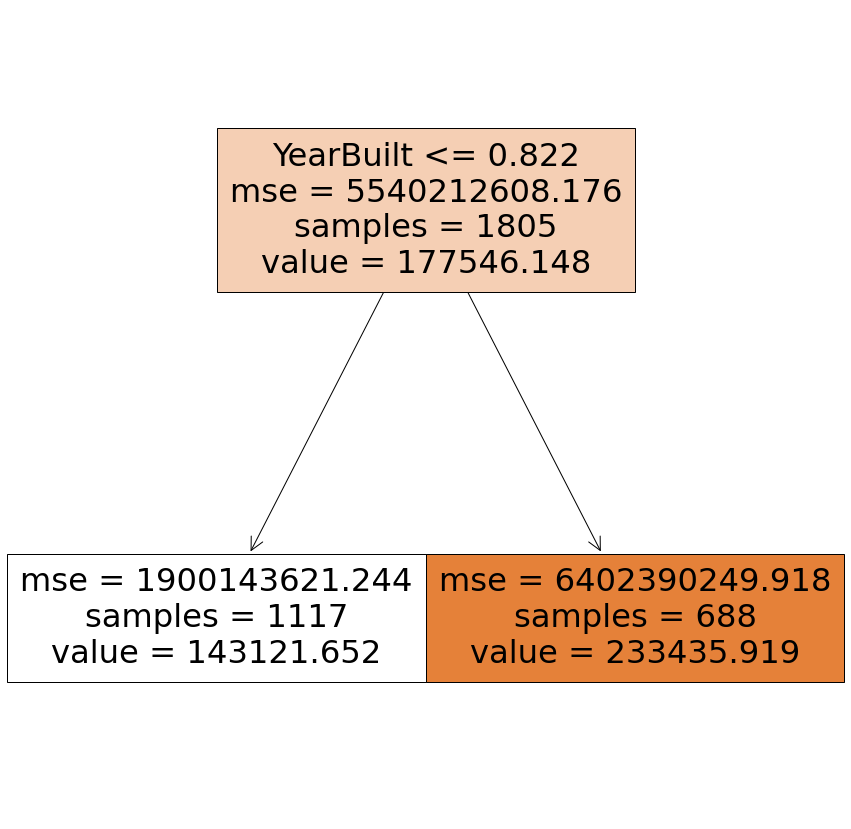

In [16]:
# Visualize the decision tree
plt.figure(figsize=(15,15))
plot_tree(tree_model,feature_names=x.columns,filled=True)
plt.show()

In [82]:
from sklearn.model_selection import GridSearchCV

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train.values.ravel())

train_preds = rf_model.predict(X_train)
train_mse = mean_squared_error(y_train,train_preds)
print('Train set MSE is {:.3f}'.format(train_mse))
print('Train set R2 is {:.3f}'.format(rf_model.score(X_train,y_train)))

test_preds = rf_model.predict(X_test)
test_mse = mean_squared_error(y_test,test_preds)
print('Test set MSE is {:.3f}'.format(test_mse))
print('Test set R2 is {:.3f}'.format(rf_model.score(X_test,y_test)))

Train set MSE is 99084334.942
Train set R2 is 0.982
Test set MSE is 581078153.764
Test set R2 is 0.900


In [27]:
def calc_feature_importances(model,feat_names,num_to_show):
    # Determine the relative importance of each feature using the random forest model
    importances = model.feature_importances_
    # Get an array of the indices that would sort "importances" in reverse order to get largest to smallest
    indices = np.argsort(importances)[::-1]
    ranked_feats = []
    for i in range(len(indices)):
        feat_name = feat_names[indices[i]]
        ranked_feats.append(feat_name)
    RF_ranking = pd.DataFrame()
    RF_ranking['Feat Index'] = indices
    RF_ranking['Feature'] = ranked_feats
    RF_ranking['Importance'] = np.sort(importances)[::-1]
    display(RF_ranking.iloc[:num_to_show,:])

    # Plot the importance value for each feature
    RF_ranking[:num_to_show][::-1].plot(x='Feature',y='Importance',kind='barh',figsize=(12,7),legend=False,title='RF Feature Importance')
    plt.show()
    return

,Feat Index,Feature,Importance
0,2,YearBuilt,0.300530
1,0,GrLivArea,0.255585
2,4,1stFlrSF,0.191302
3,140,ExterQual_TA,0.032134
4,1,LotArea,0.021327
5,5,2ndFlrSF,0.015978
6,12,Fireplaces,0.013068
7,3,YearRemodAdd,0.011218
8,160,BsmtExposure_Gd,0.008561
9,274,OverallQual_9,0.007757


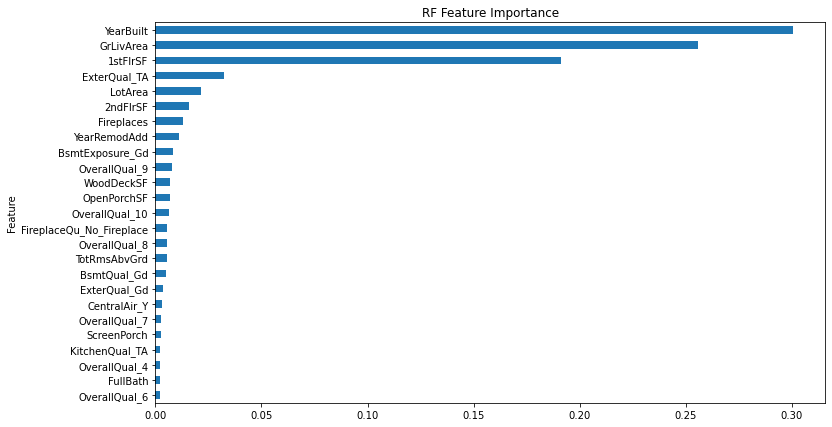

In [28]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
top_feats = 25
calc_feature_importances(rf_model,x.columns,top_feats)

In [ ]:
params = {'min_samples_leaf':[1,3],'n_estimators':[100,1000],
          'max_features':[1,None],'max_samples':[1,None]}

model = RandomForestRegressor()
grid_search = GridSearchCV(model,params)
grid_search.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

In [ ]:
grid_search.best_params_

In [5]:
cleaned

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,68.516053,7890,Pave,No_alley,Reg,...,166,0,No_Pool,No_Fence,No_Misc,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.000000,4235,Pave,No_alley,Reg,...,0,0,No_Pool,No_Fence,No_Misc,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.000000,6060,Pave,No_alley,Reg,...,0,0,No_Pool,No_Fence,No_Misc,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.000000,8146,Pave,No_alley,Reg,...,111,0,No_Pool,No_Fence,No_Misc,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.000000,8400,Pave,No_alley,Reg,...,0,0,No_Pool,No_Fence,No_Misc,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,952,121000,30,RL,68.516053,8854,Pave,No_alley,Reg,...,40,0,No_Pool,No_Fence,No_Misc,0,5,2009,WD,Normal
760,905402060,1733,139600,20,RL,68.516053,13680,Pave,No_alley,IR1,...,0,0,No_Pool,No_Fence,No_Misc,0,6,2009,WD,Normal
761,909275030,2002,145000,90,RH,82.000000,6270,Pave,No_alley,Reg,...,0,0,No_Pool,No_Fence,No_Misc,0,8,2007,WD,Normal
762,907192040,1842,217500,60,RL,68.516053,8826,Pave,No_alley,Reg,...,0,0,No_Pool,No_Fence,No_Misc,0,7,2007,WD,Normal


In [33]:
cleaned

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,68.516053,7890,Pave,No_alley,Reg,...,166,0,No_Pool,No_Fence,No_Misc,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.000000,4235,Pave,No_alley,Reg,...,0,0,No_Pool,No_Fence,No_Misc,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.000000,6060,Pave,No_alley,Reg,...,0,0,No_Pool,No_Fence,No_Misc,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.000000,8146,Pave,No_alley,Reg,...,111,0,No_Pool,No_Fence,No_Misc,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.000000,8400,Pave,No_alley,Reg,...,0,0,No_Pool,No_Fence,No_Misc,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,952,121000,30,RL,68.516053,8854,Pave,No_alley,Reg,...,40,0,No_Pool,No_Fence,No_Misc,0,5,2009,WD,Normal
760,905402060,1733,139600,20,RL,68.516053,13680,Pave,No_alley,IR1,...,0,0,No_Pool,No_Fence,No_Misc,0,6,2009,WD,Normal
761,909275030,2002,145000,90,RH,82.000000,6270,Pave,No_alley,Reg,...,0,0,No_Pool,No_Fence,No_Misc,0,8,2007,WD,Normal
762,907192040,1842,217500,60,RL,68.516053,8826,Pave,No_alley,Reg,...,0,0,No_Pool,No_Fence,No_Misc,0,7,2007,WD,Normal


In [36]:
cleaned.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [6]:
cleaned.select_dtypes('object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1,RL,Pave,No_alley,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,...,Detchd,Unf,TA,TA,Y,No_Pool,No_Fence,No_Misc,WD,Normal
2,RL,Pave,No_alley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,...,Attchd,Fin,TA,TA,Y,No_Pool,No_Fence,No_Misc,WD,Normal
3,C (all),Pave,No_alley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,...,Detchd,Unf,TA,Po,N,No_Pool,No_Fence,No_Misc,WD,Normal
4,RL,Pave,No_alley,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,...,Detchd,Unf,TA,TA,N,No_Pool,No_Fence,No_Misc,WD,Normal
5,RL,Pave,No_alley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Fin,TA,TA,Y,No_Pool,No_Fence,No_Misc,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,RL,Pave,No_alley,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,...,Detchd,Unf,Fa,Po,P,No_Pool,No_Fence,No_Misc,WD,Normal
760,RL,Pave,No_alley,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,...,Attchd,Unf,TA,TA,Y,No_Pool,No_Fence,No_Misc,WD,Normal
761,RH,Pave,No_alley,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,...,2Types,Unf,TA,TA,Y,No_Pool,No_Fence,No_Misc,WD,Normal
762,RL,Pave,No_alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,Fin,TA,TA,Y,No_Pool,No_Fence,No_Misc,WD,Normal


In [39]:
cleaned.select_dtypes(['float64','int64'])

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1,909176150,856,126000,30,68.516053,7890,6,6,1939,1950,...,399.0,0,0,0,0,166,0,0,3,2010
2,905476230,1049,139500,120,42.000000,4235,5,5,1984,1984,...,266.0,0,105,0,0,0,0,0,2,2009
3,911128020,1001,124900,30,60.000000,6060,5,9,1930,2007,...,216.0,154,0,42,86,0,0,0,11,2007
4,535377150,1039,114000,70,80.000000,8146,4,8,1900,2003,...,281.0,0,0,168,0,111,0,0,5,2009
5,534177230,1665,227000,60,70.000000,8400,8,6,2001,2001,...,528.0,0,45,0,0,0,0,0,11,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,952,121000,30,68.516053,8854,6,6,1916,1950,...,192.0,0,98,0,0,40,0,0,5,2009
760,905402060,1733,139600,20,68.516053,13680,3,5,1955,1955,...,452.0,0,0,0,0,0,0,0,6,2009
761,909275030,2002,145000,90,82.000000,6270,5,6,1949,1950,...,871.0,0,0,0,0,0,0,0,8,2007
762,907192040,1842,217500,60,68.516053,8826,7,5,2000,2000,...,486.0,193,96,0,0,0,0,0,7,2007


In [25]:
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler

In [40]:
def ord_enc_func(housing):
    housing = housing.reset_index() #duplicated index values in csv need to reset
    housing = housing.drop('index', axis = 1) # drop original index with duplicates
    price = housing['SalePrice'] # Create Y Variable
    category = housing.select_dtypes('object') #Select all 'object' data types  which are all categorical
    housing_num = housing.select_dtypes(['int64', 'float64']) # Select numeric data types
    housing_num_PID = housing_num['PID'] # PID index should not be scaled, remove and put back later
    ## Numeric Colums to convert
    # MSSubClass, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MoSold, YrSold
    # How to handle MiscVal???
    #Leave YearBuilt and YearRemodAdd as numeric to be scaled
    housing_num = housing_num.drop(['PID', 'SalePrice', 'MSSubClass', 'OverallQual', \
    'OverallCond', 'MoSold', 'YrSold', 'MiscVal'], axis = 1)
    housing_num2cat = housing[['MSSubClass', 'OverallQual', 'OverallCond', \
    'MoSold', 'YrSold', 'MiscVal']]
    category = pd.concat([category.astype(str), housing_num2cat.astype(str)], axis = 1) #Add all categorical features to dataframe to be dummified
    oe = OrdinalEncoder()
    cat_ord_enc = oe.fit_transform(category)
    scaler = MinMaxScaler()
    scaler.fit(housing_num)
    housing_num_scaled = scaler.transform(housing_num)
    housing_num_scaled = pd.DataFrame(housing_num_scaled, columns = housing_num.columns)
    cat_ord_enc =pd.DataFrame(cat_ord_enc, columns = category.columns)
    full_oe_data = pd.concat([housing_num_PID, housing_num_scaled, cat_ord_enc], axis = 1) #Concatenate dummified data and numeric data
    return full_oe_data, pd.DataFrame(price)


In [76]:
x,y = ord_enc_func(cleaned)
x

,PID,GrLivArea,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,OverallQual,OverallCond,MoSold,YrSold,MiscVal
0,909176150,0.120221,0.162726,0.030802,0.485507,0.000000,0.000000,0.104021,0.000000,0.264555,...,4.0,1.0,9.0,4.0,6.0,6.0,5.0,5.0,4.0,0.0
1,905476230,0.164671,0.071918,0.013718,0.811594,0.566667,0.093125,0.241259,0.257536,0.044521,...,4.0,1.0,9.0,4.0,0.0,5.0,4.0,4.0,3.0,0.0
2,911128020,0.153616,0.133562,0.022249,0.420290,0.950000,0.000000,0.322115,0.000000,0.042808,...,4.0,1.0,9.0,4.0,6.0,5.0,8.0,2.0,1.0,0.0
3,535377150,0.162368,0.202055,0.031999,0.202899,0.883333,0.000000,0.000000,0.000000,0.173373,...,4.0,1.0,9.0,4.0,11.0,4.0,7.0,7.0,3.0,0.0
4,534177230,0.306541,0.167808,0.033186,0.934783,0.850000,0.000000,0.281031,0.000000,0.071490,...,4.0,1.0,9.0,4.0,10.0,8.0,5.0,2.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,903205040,0.142331,0.162726,0.035308,0.318841,0.000000,0.000000,0.000000,0.000000,0.407534,...,4.0,1.0,9.0,4.0,6.0,6.0,5.0,7.0,3.0,0.0
2575,905402060,0.322202,0.162726,0.057865,0.601449,0.083333,0.000000,0.000000,0.000000,0.000000,...,4.0,1.0,9.0,4.0,5.0,3.0,4.0,8.0,3.0,0.0
2576,909275030,0.384155,0.208904,0.023230,0.557971,0.000000,0.000000,0.124126,0.000000,0.306935,...,4.0,1.0,9.0,4.0,15.0,5.0,5.0,10.0,1.0,0.0
2577,907192040,0.347305,0.162726,0.035177,0.927536,0.833333,0.090000,0.367570,0.000000,0.061644,...,4.0,1.0,9.0,4.0,10.0,7.0,4.0,9.0,1.0,0.0


In [77]:
x = x.drop('PID', axis = 1)
x

,GrLivArea,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,OverallQual,OverallCond,MoSold,YrSold,MiscVal
0,0.120221,0.162726,0.030802,0.485507,0.000000,0.000000,0.104021,0.000000,0.264555,0.266999,...,4.0,1.0,9.0,4.0,6.0,6.0,5.0,5.0,4.0,0.0
1,0.164671,0.071918,0.013718,0.811594,0.566667,0.093125,0.241259,0.257536,0.044521,0.327199,...,4.0,1.0,9.0,4.0,0.0,5.0,4.0,4.0,3.0,0.0
2,0.153616,0.133562,0.022249,0.420290,0.950000,0.000000,0.322115,0.000000,0.042808,0.261073,...,4.0,1.0,9.0,4.0,6.0,5.0,8.0,2.0,1.0,0.0
3,0.162368,0.202055,0.031999,0.202899,0.883333,0.000000,0.000000,0.000000,0.173373,0.126326,...,4.0,1.0,9.0,4.0,11.0,4.0,7.0,7.0,3.0,0.0
4,0.306541,0.167808,0.033186,0.934783,0.850000,0.000000,0.281031,0.000000,0.071490,0.252651,...,4.0,1.0,9.0,4.0,10.0,8.0,5.0,2.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,0.142331,0.162726,0.035308,0.318841,0.000000,0.000000,0.000000,0.000000,0.407534,0.296943,...,4.0,1.0,9.0,4.0,6.0,6.0,5.0,7.0,3.0,0.0
2575,0.322202,0.162726,0.057865,0.601449,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.0,1.0,9.0,4.0,5.0,3.0,4.0,8.0,3.0,0.0
2576,0.384155,0.208904,0.023230,0.557971,0.000000,0.000000,0.124126,0.000000,0.306935,0.312227,...,4.0,1.0,9.0,4.0,15.0,5.0,5.0,10.0,1.0,0.0
2577,0.347305,0.162726,0.035177,0.927536,0.833333,0.090000,0.367570,0.000000,0.061644,0.307236,...,4.0,1.0,9.0,4.0,10.0,7.0,4.0,9.0,1.0,0.0


In [78]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [79]:
tree_model = DecisionTreeRegressor(max_depth = 20, random_state=0)
tree_model.fit(X_train, y_train)
train_preds = tree_model.predict(X_train)
train_mse = mean_squared_error(y_train,train_preds)
print('Train set MSE is {:.3f}'.format(train_mse))
print('Train set R2 is {:.3f}'.format(tree_model.score(X_train,y_train)))

test_preds = tree_model.predict(X_test)
test_mse = mean_squared_error(y_test,test_preds)
print('Test set MSE is {:.3f}'.format(test_mse))
print('Test set R2 is {:.3f}'.format(tree_model.score(X_test,y_test)))


Train set MSE is 4371.761
Train set R2 is 1.000
Test set MSE is 1336043708.195
Test set R2 is 0.771


In [80]:
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)

train_preds = rf_model.predict(X_train)
train_mse = mean_squared_error(y_train,train_preds)
print('Train set MSE is {:.3f}'.format(train_mse))
print('Train set R2 is {:.3f}'.format(rf_model.score(X_train,y_train)))

test_preds = rf_model.predict(X_test)
test_mse = mean_squared_error(y_test,test_preds)
print('Test set MSE is {:.3f}'.format(test_mse))
print('Test set R2 is {:.3f}'.format(rf_model.score(X_test,y_test)))

<ipython-input-80-24da001b8cf8>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Train set MSE is 92889962.852
Train set R2 is 0.983
Test set MSE is 509070867.344
Test set R2 is 0.913


In [ ]:
params = [{
    "n_estimators": [25, 50, 100],
    "min_samples_leaf": range(1, 10),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int)}]

model = RandomForestRegressor()
grid_search = GridSearchCV(model,params)
grid_search.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

In [88]:
grid_search.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 25,
 'random_state': 42}

In [90]:
rf_model = RandomForestRegressor(min_samples_leaf= 1, min_samples_split =  2, n_estimators=25)
rf_model.fit(X_train, y_train)

train_preds = rf_model.predict(X_train)
train_mse = mean_squared_error(y_train,train_preds)
print('Train set MSE is {:.3f}'.format(train_mse))
print('Train set R2 is {:.3f}'.format(rf_model.score(X_train,y_train)))

test_preds = rf_model.predict(X_test)
test_mse = mean_squared_error(y_test,test_preds)
print('Test set MSE is {:.3f}'.format(test_mse))
print('Test set R2 is {:.3f}'.format(rf_model.score(X_test,y_test)))

<ipython-input-90-3cdfc26c8b3d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Train set MSE is 117391913.484
Train set R2 is 0.979
Test set MSE is 543775090.771
Test set R2 is 0.907


In [ ]:
#params = {'min_samples_leaf':[1,3,10],'n_estimators':[100,1000],
          #'max_features':[0.1,0.5,1.],'max_samples':[0.5,None]}

In [85]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': None,
 'max_samples': None,
 'min_samples_leaf': 1,
 'n_estimators': 1000}

<ipython-input-86-de48fd04c7b6>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Train set MSE is 89343018.000
Train set R2 is 0.984
Test set MSE is 513501902.079
Test set R2 is 0.912
